<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_estrazione_features_PCA_da_features_neurali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estrazione features PCA da features estratte con Resnet 50 non normalizzate

In [ ]:
# scarico da dropbox le features precedentemente estratte con resnet 50

!wget https://www.dropbox.com/s/l1ybi3k5zmusf9m/features_resnet.zip?dl=0
!unzip features_resnet.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-08 20:12:27--  https://www.dropbox.com/s/l1ybi3k5zmusf9m/features_resnet.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l1ybi3k5zmusf9m/features_resnet.zip [following]
--2022-05-08 20:12:27--  https://www.dropbox.com/s/raw/l1ybi3k5zmusf9m/features_resnet.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc90ada3547bf5a181b4d56bbd4e.dl.dropboxusercontent.com/cd/0/inline/Bk4KKeEaqJmgF2ccOkYbDfA3o_3EyHmCvF2alCUM4w3uvSTzGVO4LbyMSKLHQnGCFI8NAHsObr4ftblAejGRdalMmV0d_AcGe1sGZvi8IU7Edkjvjqbtuo-LflvzN4llOHEj0y05dlAQd-Y8DuzYyKsHwzSoRjQ51InYeIizMRpLAA/file# [following]
--2022-05-08 20:12:28--  https://uc90ada3547bf5a181b4d56bbd4e.dl.dropboxusercontent.com/cd/0/inline/Bk4KKeEaqJmgF2ccOkYbDfA3o_3EyHmCvF2alCUM4w

In [ ]:
import numpy as np

# Carico in memoria le features
x_train = np.load('features_resnet/features_train_resnet.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test = np.load('features_resnet/features_test_resnet.npy')
y_test = np.load('array_labels/array_test_labels.npy')

In [ ]:
print(np.shape(x_train))
print(np.shape(x_test))

(31805, 2048)
(7178, 2048)


In [ ]:

X = x_train
print(np.shape(X))

(31805, 2048)


In [ ]:
# Implemento la PCA: devo calcolare la matrice di trasformazione T
# stimata dai dati di train

# Calcolo la media di ogni feature e centro i dati
m = np.mean(X,axis=0)
Xc = X - m

# Calcolo la matrice di covarianza dei dati centrati
C = np.cov(Xc, rowvar=False)  

# Calcolo autovalori e autovettori della matrice di covarianza

lambdas,U = np.linalg.eigh(C)


# Ordino gli autovalori dal più grande al più piccolo
best_eig_idxs = np.argsort(lambdas)[::-1]
best_eig = lambdas[best_eig_idxs]
best_U = U[:,best_eig_idxs]

(31805, 400)


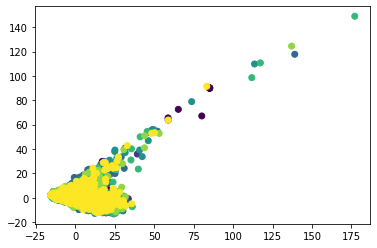

In [ ]:
import matplotlib.pyplot as plt

# Costruisco la matrice di trasformazione T: 
# - in colonna gli autovettori corrispondenti ai N... autovalori più grandi
T = best_U[:,:400]

# Applico la trasformazione ai dati di train, faccio uno scatter plot dei dati trasformati
# la trasformazione si esegue moltiplicando i dati per la matrice di trasformazione T
XT = np.dot(Xc, T)
print(np.shape(XT))
plt.scatter(XT[:,0],XT[:,1], c=y_train)
plt.show()
np.save('features_train_PCA_400_da_neurali.npy', XT)

In [ ]:
# Applico la trasformazione ai dati di test

nobj_test = x_test.shape[0]
print(np.shape(nobj_test))

X_test = x_test

Xc_test = X_test - m

XT_test = np.dot(Xc_test, T)
print(np.shape(XT_test))
np.save('features_test_PCA_400_da_neurali.npy', XT_test)

()
(7178, 400)


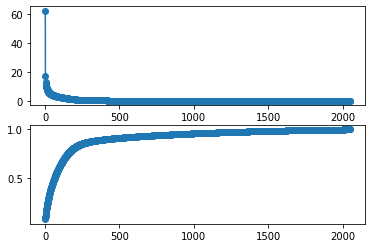

In [ ]:
# Come scelgo il numero giusto di autovalori per la mia matrice di Trasformazione

#Ordino i miei autovalori

D_ord = np.sort(lambdas)[::-1]
d = D_ord.shape[0]

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(1,d+1),D_ord)
axs[0].scatter(np.arange(1,d+1),D_ord)

y = np.cumsum(D_ord)/np.sum(D_ord)
axs[1].plot(np.arange(1,d+1),y)
axs[1].scatter(np.arange(1,d+1),y)

plt.show()
